In [1]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [4]:
fuel.head()
pd.DataFrame(X[:10,:]).head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

2024-08-26 01:05:50.475759: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [7]:
history = model.fit(
    X, y,
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2107
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4280 
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7642 
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4144 
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2445 
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1963 
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1525 
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1154 
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0946 
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0868 
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0787 
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0681  
Epoch 13/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0746 
Epoch 14/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0690  
Epoch 15/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0628 
Epoch 16/200
9/9 ━

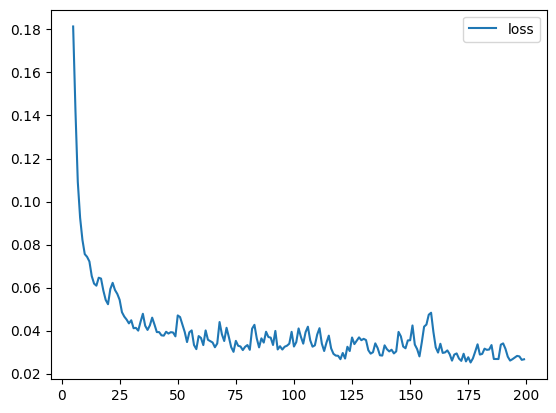

In [8]:
import pandas as pd

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();